In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# kütüphane


In [5]:
from keras.layers import Input,Dense, Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

 *veri kümesinin oluşturmak ve ayrılmak *

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255


x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

In [8]:
print("eğtim",x_train.shape)
print("test",x_test.shape)

eğtim (60000, 28, 28, 1)
test (10000, 28, 28, 1)


veriye gürültü ekleme

In [9]:

noise_factor=0.5


x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0. ,1.)
x_test_noisy = np.clip(x_test_noisy, 0. ,1.)

gürütülü veri gorselleştirme

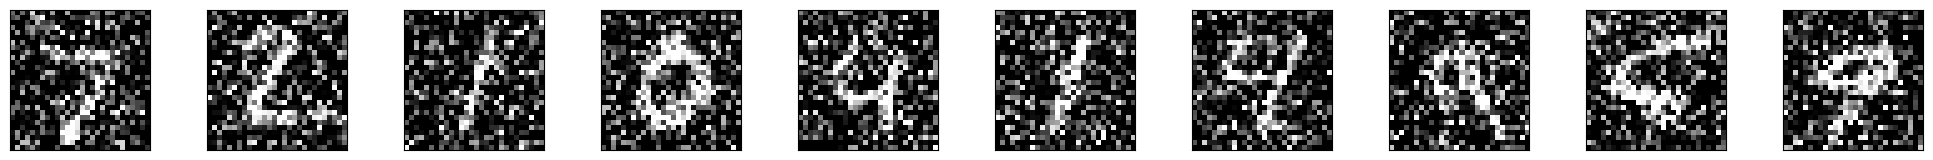

gürültürü orjinal görüntü


In [10]:
%matplotlib inline

n=10
plt.figure(figsize=(25,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print("gürültürü orjinal görüntü")


# encode modeli

In [11]:
input_img=Input(shape=(28,28,1))

x=Conv2D(32,(3,3),activation="relu",padding="same")(input_img)#aynı boyutta kalmasını
x=MaxPooling2D((2,2),padding="same")(x)

x=Conv2D(32,(3,3),activation="relu",padding="same")(x)

encoded=MaxPooling2D((2,2),padding="same")(x)

#{7,7,32}

decode modeli

In [12]:
x=Conv2D(32,(3,3),activation="relu",padding="same")(encoded)


x=UpSampling2D((2,2))(x)#büyütme işlmei

x=Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=UpSampling2D((2,2))(x)

decoded=Conv2D(1,(3,3),activation="sigmoid",padding="same")(x)



# modellern derlemesi ve eğtimi

In [13]:
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer="adadelta",loss="binary_crossentropy")

In [14]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/5
469/469 [==============================] - 144s 304ms/step - loss: 0.6581 - val_loss: 0.6325
Epoch 2/5
469/469 [==============================] - 139s 296ms/step - loss: 0.5928 - val_loss: 0.5533
Epoch 3/5
469/469 [==============================] - 139s 296ms/step - loss: 0.5255 - val_loss: 0.5125
Epoch 4/5
469/469 [==============================] - 143s 304ms/step - loss: 0.5032 - val_loss: 0.5012
Epoch 5/5
313/313 [==============================] - 5s 16ms/step


görselleştirme


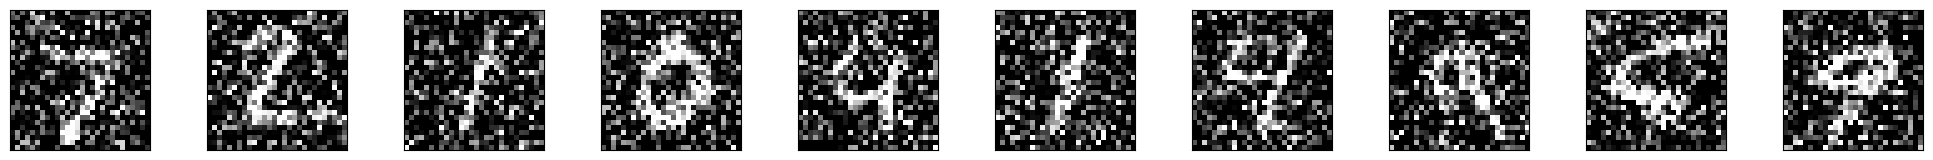

gürültürü orjinal görüntü


In [15]:
%matplotlib inline

n=10
plt.figure(figsize=(25,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print("gürültürü orjinal görüntü")
